###  Comparison of a fictitious Wallet with the IBOVESPA

In [11]:
#the shares in the Wallet refer to the price of 01/03/2022

,Assets,Amount invested,Type,Quantity
0,ITUB4,5000,Stock,233.000000
1,BBDC4,5000,Stock,280.000000
2,PETR4,5000,Stock,187.000000
3,QUAL3,5000,Stock,309.000000
4,MGLU3,5000,Stock,744.000000
5,SMAL11,10000,ETF,45.000000
6,HSML11,5000,FII,62.000000
7,BCRI11,5000,FII,46.000000
8,Tesouro Selic,50000,Fixed Income,4.775239


Text(0, 0.5, '')

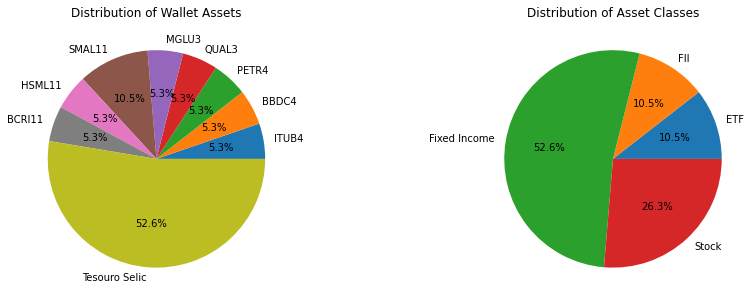

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



wallet= pd.read_excel(r"D:\Portfolio.xlsx")
display(wallet)

print('==='*30)

fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15,5)
grafico1= wallet.plot.pie(ax=ax1, labels=wallet['Assets'],y='Amount invested',legend=False,title='Distribution of Wallet Assets',figsize=(15,5),autopct='%.1f%%')
grafico1.set_ylabel('')
grafico2= wallet.groupby('Type').sum().plot.pie(ax=ax2, y='Amount invested',legend=False,title='Distribution of Asset Classes',figsize=(15,5),autopct='%.1f%%')
grafico2.set_ylabel('')


#### Getting the Quotes Throughout 2022

- IBOV

In [3]:
import pandas_datareader.data as web
date_Today= datetime.today().strftime('%Y-%m-%d')

ibov_df = web.DataReader('^BVSP', data_source='yahoo', start='2022-01-01',end=f'{date_Today}')
display(ibov_df)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125.00000,103413.000000,104823,103922.000000,11128500,103922.000000
2022-01-04,104276.00000,103096.000000,103922,103514.000000,11491600,103514.000000
2022-01-05,103514.00000,100850.000000,103514,101006.000000,0,101006.000000
2022-01-06,102235.00000,101000.000000,101006,101561.000000,11749200,101561.000000
2022-01-07,102719.00000,101104.000000,101561,102719.000000,11733200,102719.000000
...,...,...,...,...,...,...
2022-04-22,114343.00000,110591.000000,114343,111078.000000,10877300,111078.000000
2022-04-25,111155.00000,109222.000000,111077,110685.000000,11098300,110685.000000
2022-04-26,110685.00000,107978.000000,110684,108213.000000,11747500,108213.000000


- My wallet:

,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11
Date,,,,,,,,
2022-01-03,21.439968,17.818783,26.614141,16.17,6.72,109.550003,79.845985,106.949997
2022-01-04,22.047983,17.935612,26.714779,15.45,6.61,107.000000,80.550743,107.500000
2022-01-05,21.629351,17.808794,25.680954,15.20,6.42,102.169998,78.714401,107.800003
2022-01-06,22.067915,18.062429,25.662655,15.29,6.25,101.830002,79.895615,107.699997
2022-01-07,22.556320,18.325125,25.781591,15.48,6.22,101.949997,78.843445,107.989998
...,...,...,...,...,...,...,...,...
2022-04-22,25.670000,19.219999,30.559999,14.04,5.55,112.000000,83.650002,108.699997
2022-04-25,25.570000,19.100000,30.110001,14.31,5.44,113.400002,82.959999,108.400002
2022-04-26,24.700001,18.280001,30.059999,14.07,5.18,111.419998,81.000000,109.000000


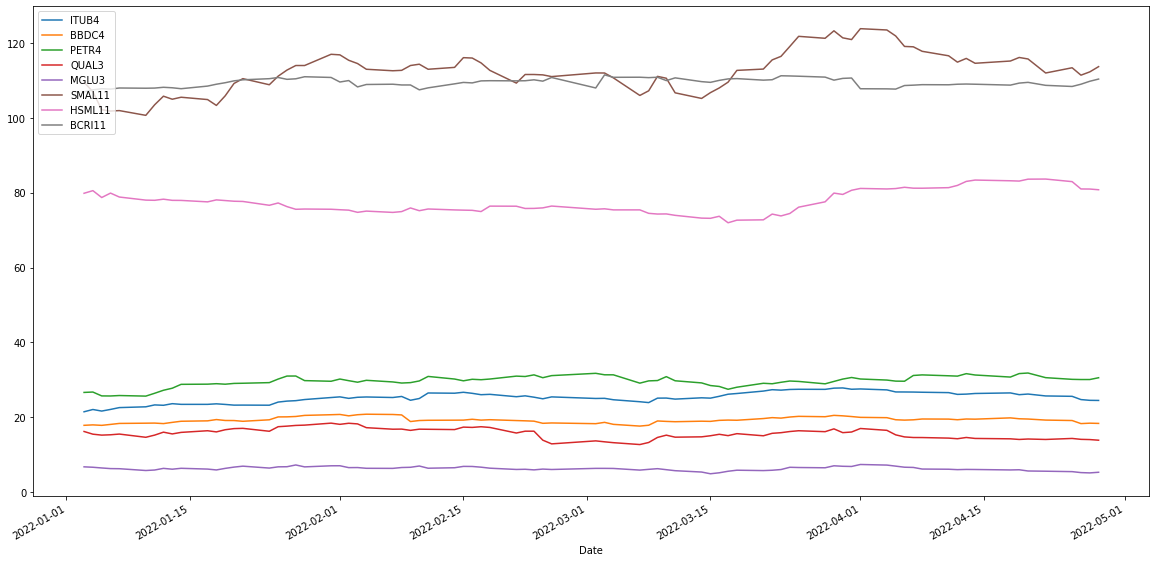

In [4]:
wallet_df = pd.DataFrame()

for aset in wallet['Assets']:
    if 'Tesouro'not in aset:           
        wallet_df[aset] =  web.DataReader(f'{aset}.SA', data_source='yahoo', start='2022-01-01',end=f'{date_Today}') ['Adj Close']
wallet_df = wallet_df.ffill()        
display(wallet_df)        
wallet_df.plot(figsize=(20,10))
plt.legend(loc='upper left')

- of Tesouro Selic:

In [5]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro_df = pd.read_csv(link, sep=';',decimal=',')
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'],format='%d/%m/%Y')
# Tipo Titulo = Type of Title
tesouro_df = tesouro_df.loc[(tesouro_df['Tipo Titulo'] == 'Tesouro Selic'),:]

display(tesouro_df)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
1,Tesouro Selic,01/03/2027,2021-11-17,0.26,0.27,10969.75,10960.63,10960.63
12,Tesouro Selic,01/03/2023,2021-11-19,0.02,0.03,11124.87,11120.14,11120.14
13,Tesouro Selic,01/09/2024,2021-11-19,0.11,0.12,11093.20,11086.79,11086.79
21,Tesouro Selic,01/03/2025,2021-11-19,0.14,0.15,11076.05,11069.08,11069.08
28,Tesouro Selic,01/03/2027,2021-11-19,0.26,0.27,10977.26,10968.14,10968.14
...,...,...,...,...,...,...,...,...
121870,Tesouro Selic,01/09/2024,2021-06-30,0.23,0.24,10818.07,10814.66,10812.76
121878,Tesouro Selic,01/03/2025,2021-06-30,0.25,0.26,10798.20,10794.26,10792.36
121885,Tesouro Selic,01/03/2027,2021-06-30,0.30,0.31,10713.11,10707.08,10705.18
121896,Tesouro Selic,01/03/2023,2021-07-16,0.13,0.14,10896.43,10894.68,10892.82


- Merge SELIC treasure into wallet

In [6]:
tesouro_df = tesouro_df.rename(columns={'Data Base':'Date'})
wallet_df = wallet_df.merge(tesouro_df[['Date','PU Base Manha']],on='Date', how='left')
wallet_df = wallet_df.rename(columns={'PU Base Manha':'Tesouro Selic'})
display(wallet_df)


,Date,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic
0,2022-01-03,21.439968,17.818783,26.614141,16.17,6.72,109.550003,79.845985,106.949997,11228.88
1,2022-01-03,21.439968,17.818783,26.614141,16.17,6.72,109.550003,79.845985,106.949997,11201.71
2,2022-01-03,21.439968,17.818783,26.614141,16.17,6.72,109.550003,79.845985,106.949997,11183.97
3,2022-01-03,21.439968,17.818783,26.614141,16.17,6.72,109.550003,79.845985,106.949997,11088.54
4,2022-01-04,22.047983,17.935612,26.714779,15.45,6.61,107.000000,80.550743,107.500000,11232.65
...,...,...,...,...,...,...,...,...,...,...
312,2022-04-27,24.500000,18.389999,30.059999,14.01,5.10,112.300003,80.980003,109.790001,11584.79
313,2022-04-27,24.500000,18.389999,30.059999,14.01,5.10,112.300003,80.980003,109.790001,11553.33
314,2022-04-27,24.500000,18.389999,30.059999,14.01,5.10,112.300003,80.980003,109.790001,11543.42
315,2022-04-27,24.500000,18.389999,30.059999,14.01,5.10,112.300003,80.980003,109.790001,11472.09


- Calculate the amount invested

In [7]:
Amount_invested = wallet_df.copy()

for aset in wallet['Assets']:
    Amount_invested[aset] = Amount_invested[aset] * wallet.loc[wallet['Assets']==aset, 'Quantity'].values[0] 
        

df_average = Amount_invested.mean()
Amount_invested =  Amount_invested.fillna(df_average)
Amount_invested = Amount_invested.set_index('Date')
Amount_invested['Total'] = Amount_invested.sum(axis=1)
display(Amount_invested)   


C:\Users\Pichau\AppData\Local\Temp/ipykernel_16648/1613560741.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_average = Amount_invested.mean()


,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic,Total
Date,,,,,,,,,,
2022-01-03,4995.512569,4989.259186,4976.844454,4996.530024,4999.679844,4929.750137,4950.451096,4919.699860,53620.586247,93378.313416
2022-01-03,4995.512569,4989.259186,4976.844454,4996.530024,4999.679844,4929.750137,4950.451096,4919.699860,53490.843002,93248.570171
2022-01-03,4995.512569,4989.259186,4976.844454,4996.530024,4999.679844,4929.750137,4950.451096,4919.699860,53406.130261,93163.857430
2022-01-03,4995.512569,4989.259186,4976.844454,4996.530024,4999.679844,4929.750137,4950.451096,4919.699860,52950.429198,92708.156368
2022-01-04,5137.180079,5021.971283,4995.663654,4774.049941,4917.840099,4815.000000,4994.146072,4945.000000,53638.588898,93239.440026
...,...,...,...,...,...,...,...,...,...,...
2022-04-27,5708.500000,5149.199829,5621.219900,4329.090071,3794.399929,5053.500137,5020.760208,5050.340042,55320.141576,95047.151693
2022-04-27,5708.500000,5149.199829,5621.219900,4329.090071,3794.399929,5053.500137,5020.760208,5050.340042,55169.912556,94896.922672
2022-04-27,5708.500000,5149.199829,5621.219900,4329.090071,3794.399929,5053.500137,5020.760208,5050.340042,55122.589937,94849.600053


<AxesSubplot:xlabel='Date'>

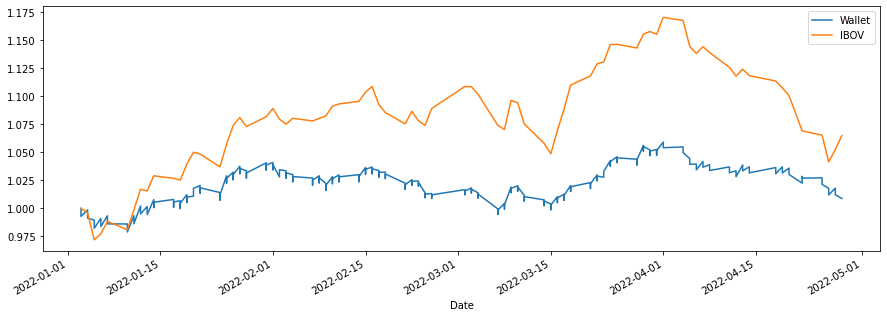

In [8]:
#Normalization

Amount_invested_Normal = Amount_invested / Amount_invested.iloc[0]
ibov_df_Normal = ibov_df/ ibov_df.iloc[0]

Amount_invested_Normal['Total'].plot(figsize=(15,5), label = 'Wallet',legend='My Wallet')
ibov_df_Normal['Adj Close'].plot(label='IBOV',legend='IBOV')

In [10]:
Profitability_Wallet =  Amount_invested_Normal['Total'].iloc[-1] -1
Profitability_IBOV = ibov_df_Normal['Adj Close'].iloc[-1] -1

print('Profitability of the Wallet {:.1%}'.format(Profitability_Wallet))
print('Profitability of the Ibovespa {:.1%}'.format(Profitability_IBOV))

Profitability of the Wallet 0.9%
Profitability of the Ibovespa 6.5%


### Thanks for see :)